[Plots.jl] Initializing backend: gadfly

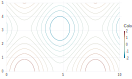

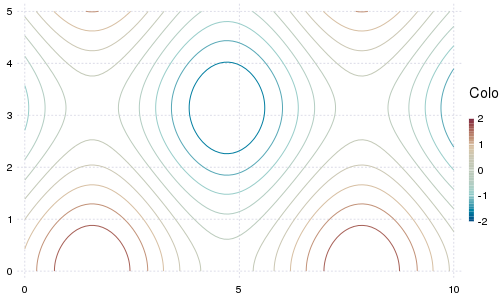

In [3]:
using Plots; gadfly()
default(size=(500,300))
x = linspace(0,10,100)
y = x / 2
plot(x, y, (x,y) -> sin(x)+cos(y), nlevels=10)

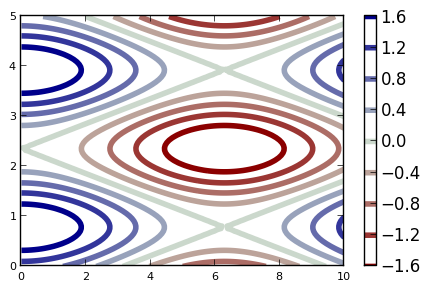

In [8]:
using Plots; pyplot()
default(size=(500,300))
x = linspace(0,10,100)
y = x / 2
plot(x, y, (x,y) -> sin(x)+cos(y), nlevels=10, w=4)

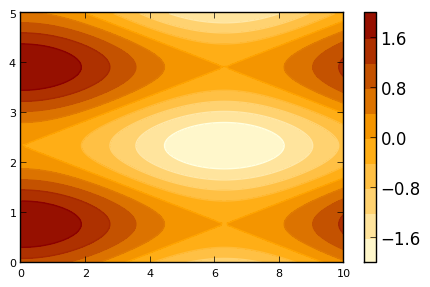

In [7]:
plot(x, y, (x,y) -> sin(x)+cos(y), nlevels=10, fill=true, c=:heat)

In [ ]:
using Plots
x = ["x1", "x2"]
y = [0.2, 0.7]
bar(x, y)

In [ ]:
using Plots; using Compose
p1 = plot(rand(10))
p2 = scatter(rand(100))
compose(context(),
    (context(0.6,0,0.4,0.4), Gadfly.render(p2.o[2])),
    (context(0,0,1,1), Gadfly.render(p1.o[2])))

In [ ]:
using Plots
import Contour
default(size=(500,300))

In [ ]:
n = 100
x = sort(randn(n)); y = sort(randn(n))
cs = Contour.contours(x, y, x * y', 5)
@show typeof(cs) length(cs)
#xys = [Contour.coordinates(c.lines) for c in cs]
for clevel in cs
    @show length(clevel.lines)
    #for (x,y) in Contour.coordinates(clevel.lines[1])
    #    @show x y
    #end
end

In [ ]:
x, y = Contour.coordinates(cs[2].lines[2])
@show x y
plot(x,y)

In [ ]:
Pkg.add("GeometricalPredicates")
Pkg.clone("https://github.com/JuliaGeometry/VoronoiDelaunay.jl")
Pkg.add("Contour")

In [ ]:
using Plots; gadfly()
default(size=(500,300))
n = 100
srand(123)
x = randn(n)*3
y = randn(n)*3
z = Float64[sin(x[i]) + cos(y[i]) for i in 1:n]
scatter(x,y,z=z,c=:heat)

In [ ]:
using VoronoiDelaunay
tess = DelaunayTessellation(n)
tmin, tmax = min_coord, max_coord
twidth = tmax - tmin
function squash(a)
    amin, amax = extrema(a)
    v = similar(a)
    for i in eachindex(a)
        v[i] = tmin + twidth * (a[i] - amin) / (amax - amin)
    end
    v
end
function zippoints(x, y)
    x, y = squash(x), squash(y)
    Point2D[Point(x[i], y[i]) for i in eachindex(x)]
end
function zippoints(x, y, z)
    x, y, z = squash(x), squash(y), squash(z)
    Point3D[Point(x[i], y[i], z[i]) for i in eachindex(x)]
end

In [ ]:
a = zippoints(x, y)
push!(tess, a)

In [ ]:
for tri in tess
    println(tri)
end

In [ ]:
tess